# Part 3: Computer Vision

Set up GPU enviornment using this guide: https://saturncloud.io/blog/how-to-run-jupyter-notebook-on-gpus/

# Imports

In [1]:
import torch

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from visual_genome import local as vg
from PIL import Image as PIL_Image
import requests
from io import StringIO
from io import BytesIO
%matplotlib inline

In [2]:
import fiftyone as fo
import fiftyone.zoo as foz

***Python 3.8 Deprecation Notice***
Python 3.8 will no longer be supported in new releases after October 1, 2024.
Please upgrade to Python 3.9 or later.
For additional details please see https://deprecation.voxel51.com


Checking GPU is being used

In [2]:
torch.cuda.is_available()

True

In [3]:
# Model (YOLO v5)
model = torch.hub.load("ultralytics/yolov5", "yolov5s")  # or yolov5n - yolov5x6, custom

Using cache found in C:\Users\adam/.cache\torch\hub\ultralytics_yolov5_master


WARNING  Python>=3.10 is required, but Python==3.8.20 is currently installed 


YOLOv5  2024-10-20 Python-3.8.20 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 4080, 16376MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


# Testing Visual Genome Dataset

In [4]:
ids = vg.get_all_image_data("VisualGenome-Test/visual_genome/data/annotations")
image = ids[0]
print(ids[0]) # print 1st image info

id: 1, coco_id: -1, flickr_id: -1, width: 800, url: https://cs.stanford.edu/people/rak248/VG_100K_2/1.jpg


In [5]:
regions = vg.get_all_region_descriptions("VisualGenome-Test/visual_genome/data/annotations")
print("The first region description is: ", regions[0][0].phrase) # first 0 means first image, second 0 means first region description
print("It is located in a bounding box specified by x:%d, y:%d, width:%d, height:%d" % (regions[0][0].x, regions[0][0].y, regions[0][0].width, regions[0][0].height))

The first region description is:  the clock is green in colour
It is located in a bounding box specified by x:421, y:57, width:82, height:139


In [9]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
def visualize_regions(image, regions):
    response = requests.get(image.url)
    img = PIL_Image.open(BytesIO(response.content))
    plt.imshow(img)
    ax = plt.gca()
    for region in regions:
        ax.add_patch(Rectangle((region.x, region.y),
                               region.width,
                               region.height,
                               fill=False,
                               edgecolor='red',
                               linewidth=3))
        ax.text(region.x, region.y, region.phrase, style='italic', bbox={'facecolor':'white', 'alpha':0.7, 'pad':10})
    fig = plt.gcf()
    plt.tick_params(labelbottom='off', labelleft='off')
    plt.title("Image 1 (limited to first 8 regions)")
    plt.show()

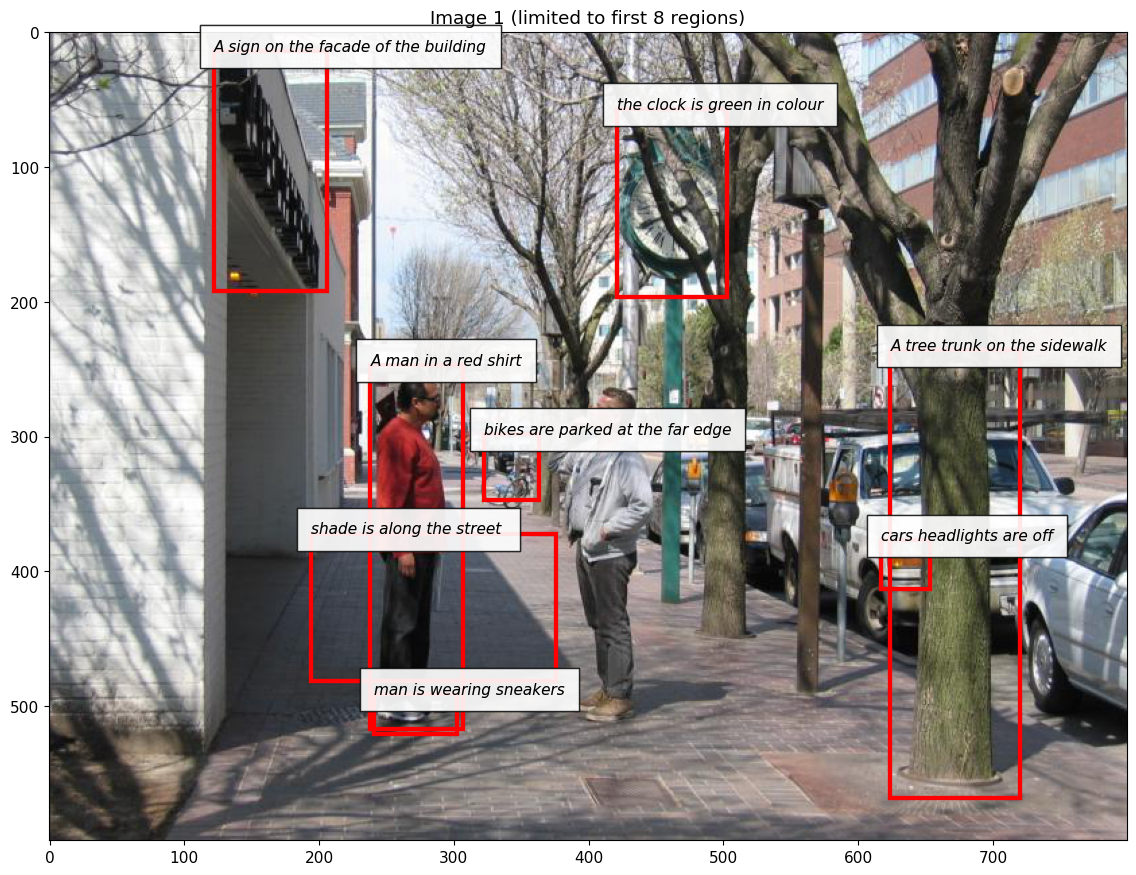

In [10]:
visualize_regions(image, regions[0][:8]) # for image 1 (index 0), show first 8 regions

In [ ]:
regions = vg.get_all_region_descriptions("VisualGenome-Test/visual_genome/data/annotations")

# Testing YOLOV5